In [1]:
#testing purpose
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
dataset = pd.read_csv('../dataset/train/train.csv')

# Encode the color labels numerically
label_encoder = LabelEncoder()
dataset['repeated_colour'] = label_encoder.fit_transform(dataset['repeated_colour'])

# Split features and target variable
X = dataset.drop(columns=['grid', 'repeated_colour'])
y = dataset['repeated_colour']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training with hyperparameter tuning
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Model evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
# Get unique classes from the label encoder
unique_classes = label_encoder.classes_

# Print classification report with specified labels
#print(classification_report(y_test, y_pred, labels=range(len(unique_classes)), target_names=unique_classes, zero_division='warn'))

# Load the new dataset
new_data = pd.read_csv('../dataset/test/test.csv')

# Drop the target variable from the new dataset
new_data_features = new_data.drop(columns=['grid', 'repeated_colour'])

# Make predictions
new_predictions = rf_classifier.predict(new_data_features)

# Decode the numerical predictions back to color labels
decoded_predictions = label_encoder.inverse_transform(new_predictions)

# Extract grid values
grid_values = new_data['grid']

# Create a mapping of color labels to numerical representations
color_numerical_map = {label: i for i, label in enumerate(decoded_predictions)}


# Combine grid values with predicted colors
predictions_with_grid = pd.DataFrame({'grid': grid_values, 'predicted_color': decoded_predictions})

# Print the predictions with corresponding grid values
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Print the DataFrame
#print(predictions_with_grid)


Accuracy: 0.9524986271279516


In [2]:
#validating purpose
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
dataset = pd.read_csv('../dataset/train/train.csv')

# Encode the color labels numerically
label_encoder = LabelEncoder()
dataset['repeated_colour'] = label_encoder.fit_transform(dataset['repeated_colour'])

# Split features and target variable
X = dataset.drop(columns=['grid', 'repeated_colour'])
y = dataset['repeated_colour']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training with hyperparameter tuning
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Model evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
# Get unique classes from the label encoder
unique_classes = label_encoder.classes_

# Print classification report with specified labels
#print(classification_report(y_test, y_pred, labels=range(len(unique_classes)), target_names=unique_classes, zero_division='warn'))

# Load the new dataset
new_data = pd.read_csv('../dataset/validation/validation.csv')

# Drop the target variable from the new dataset
new_data_features = new_data.drop(columns=['grid'])

# Make predictions
new_predictions = rf_classifier.predict(new_data_features)

# Decode the numerical predictions back to color labels
decoded_predictions = label_encoder.inverse_transform(new_predictions)

# Extract grid values
grid_values = new_data['grid']

# Create a mapping of color labels to numerical representations
color_numerical_map = {label: i for i, label in enumerate(decoded_predictions)}


# Combine grid values with predicted colors
predictions_with_grid = pd.DataFrame({'grid': grid_values, 'predicted_color': decoded_predictions})

# Store predictions_with_grid DataFrame into a CSV file
predictions_with_grid.to_csv('../dataset/validation/predictions_with_grid.csv', index=False)

# Print the predictions with corresponding grid values
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Print the DataFrame
#print(predictions_with_grid)


Accuracy: 0.9524986271279516


In [3]:
# Load the CSV files containing HSV values and predictions
csv_data = pd.read_csv('../dataset/validation/validation.csv')
predictions_with_grid = pd.read_csv('../dataset/validation/predictions_with_grid.csv')

# Merge the two DataFrames based on the common column 'grid'
merged_data = pd.merge(csv_data, predictions_with_grid, on='grid')

# Save the merged DataFrame to a CSV file
merged_data.to_csv('../dataset/validation/merged_data.csv', index=False)
print("merged_data.csv saved")

merged_data.csv saved


22 40


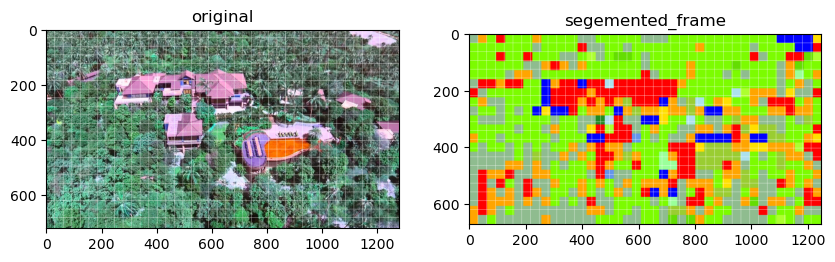

In [4]:
import pandas as pd
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Load the merged CSV file
merged_data = pd.read_csv('../dataset/validation/merged_data.csv')
image = cv2.imread('C:/Users/LENOVO/OneDrive/Desktop/major/dataset/test/image/image.jpg')

# Get the last row of the CSV file
last_row = merged_data.iloc[-1]

# Extract the grid coordinates from the last row
grid_coordinates = last_row[0].strip('"')

# Extract the grid row and column using a regular expression
match = re.match(r'Grid\((\d+), (\d+)\)', grid_coordinates)
grid_row, grid_col = map(int, match.groups())
#print(grid_row,grid_col)
#print(type(grid_row))
# Calculate the image height and width based on the grid coordinates
image_height = grid_row * 32
image_width = grid_col * 32
rw=grid_row+1
cl=grid_col+1
print(rw,cl)
# Define the grid size and spacing
grid_size = 32
grid_spacing = grid_size - 1

# Create a color map based on the color_ranges variable
color_map = {
    "black": (0, 0, 0),
    "white": (255, 255, 255),
    "Red": (255, 0, 0),
    "Orange": (255, 165, 0),
    "Inchworm": (143, 188, 143),
    "Lawn Green": (124, 252, 0),
    "Bright Green": (100, 221, 2),
    "Celadon": (172, 225, 238),
    "Pastel Green": (173, 255, 47),
    "Green": (0, 255, 0),
    "Pistachio": (179, 238, 225),
    "Dollar Bill": (255, 223, 0),
    "Asparagus": (154, 205, 50),
    "Dark Pastel Green": (154, 255, 154),
    "Camouflage Green": (100, 149, 237),
    "India Green": (34, 139, 34),
    "Blue": (0, 0, 255),
    "Indigo": (75, 0, 130),
    "Purple": (128, 0, 128),
    "Pink": (255, 192, 203),
    "Dark Olive Green": (85, 107, 47),
    "Rifle Green": (64, 128, 128),
    "RAINBOW": (255, 0, 255)
}

# Create an empty 3D array of size image_height*image_width
image_array = np.zeros((image_height, image_width, 3), dtype=np.uint8)

# Fill the 2D array with color indexes based on the predicted_color column
for index, row in merged_data.iterrows():
    grid_str = row['grid']
    match = re.match(r'Grid\((\d+), (\d+)\)', grid_str)
    if match:
        grid_x = int(match.group(1))
        grid_y = int(match.group(2))
        #print(grid_x,',',grid_y)
        if 0 <= grid_x < rw and 0 <= grid_y < cl:
            color_name = row['predicted_color']
            cv=color_map[color_name]
            #print(color_name,cv)
            image_array[grid_x*32:grid_x*32+32, grid_y*32:grid_y*32+32,:] = cv
        else:
            print(f"Grid coordinates ({grid_x}, {grid_y}) are outside the bounds of the grid")
    else:
        print(f"Could not extract grid coordinates from '{grid_str}'")
        
# Function to draw the grid on an image
def draw_grid(image):
    # Calculate the number of grid lines
    num_horizontal_lines = image.shape[0] // grid_spacing
    num_vertical_lines = image.shape[1] // grid_spacing

    # Draw the horizontal and vertical grid lines
    for i in range(num_horizontal_lines):
        start_point = (0, i * grid_spacing)
        end_point = (image.shape[1], i * grid_spacing)
        cv2.line(image, start_point, end_point, (255, 255, 255), 1)

    for i in range(num_vertical_lines):
        start_point = (i * grid_spacing, 0)
        end_point = (i * grid_spacing, image.shape[0])
        cv2.line(image, start_point, end_point, (255, 255, 255), 1)

        
# Draw the grid on both images        
draw_grid(image)
draw_grid(image_array)

# save the segemented Frame
plt.imsave('segmented_frame.jpg', image_array)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("original")
plt.subplot(1, 2, 2)
plt.imshow(image_array)
plt.title("segemented_frame")
plt.show()

In [5]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Load the CSV file
data = pd.read_csv('../dataset/classification/classify.csv')  # Replace 'your_csv_file.csv' with the path to your CSV file

# Define true labels and predicted labels
true_labels = data['original_image']
predicted_labels = data['segmented_output']

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(cm)

# Calculate true positive (TP), false positive (FP), true negative (TN), and false negative (FN)
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

# Calculate true positive rate (TPR), false positive rate (FPR), true negative rate (TNR), and false negative rate (FNR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
TNR = TN / (FP + TN)
FNR = FN / (TP + FN)

# Print TPR, FPR, TNR, and FNR
print("\nTrue Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("True Negative Rate (TNR):", TNR)
print("False Negative Rate (FNR):", FNR)

Classification Report:
                precision    recall  f1-score   support

non_vegetation       0.23      0.44      0.30        16
    vegetation       0.90      0.77      0.83       104

      accuracy                           0.73       120
     macro avg       0.56      0.60      0.56       120
  weighted avg       0.81      0.72      0.76       120


Confusion Matrix:
[[ 7  9]
 [24 80]]

True Positive Rate (TPR): 0.7692307692307693
False Positive Rate (FPR): 0.5625
True Negative Rate (TNR): 0.4375
False Negative Rate (FNR): 0.23076923076923078


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


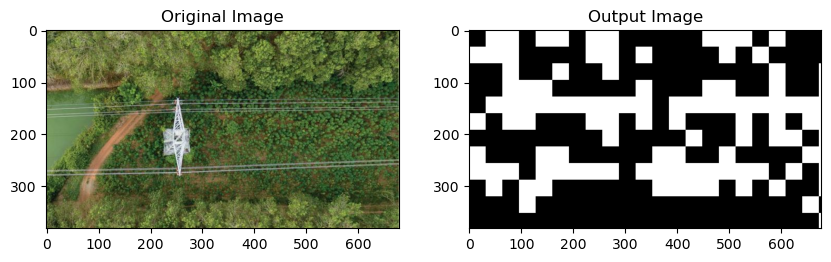

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def houghtransform(subimg):
    gray = cv2.cvtColor(subimg, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    edges = cv2.Canny(binary, 3, 5, apertureSize=3)
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=20, minLineLength=25, maxLineGap=5)
    if lines is not None:
        return True
    else:
        return False

def process_image(inputframe):
    m, n, r = inputframe.shape
    outputframe = np.zeros(inputframe.shape)
    for x in range(0, m, 32):
        for y in range(0, n, 32):
            subimg = inputframe[x:x+32, y:y+32,:]
            electricline = houghtransform(subimg)
            if electricline:
                outputframe[x:x+32, y:y+32,:] = (255,255,255)
            else:
                outputframe[x:x+32, y:y+32,:] = (0, 0, 0)
    return outputframe

# Replace 'image.jpg' with your actual image path
image_path = 'C:/Users/LENOVO/OneDrive/Desktop/major/dataset/electriclines/image9.jpg'
input_frame = cv2.imread(image_path)

# Process the image
output_image = process_image(input_frame)

# Display the original and output images side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(output_image)
plt.title('Output Image')
plt.show()

In [7]:
import cv2

# Load the image
img = cv2.imread('C:/Users/LENOVO/OneDrive/Desktop/major/dataset/electriclines/image10.png')  # Provide the path to your image

def display_rgb(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        b, g, r = img[y, x]
        img_copy = img.copy()
        cv2.putText(img_copy, f'RGB: ({r}, {g}, {b})', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        cv2.imshow('image', img_copy)
    elif event == cv2.EVENT_MOUSELEAVE:
        cv2.imshow('image', img)

# Create a window and set the mouse callback
cv2.imshow('image', img)
cv2.setMouseCallback('image', display_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

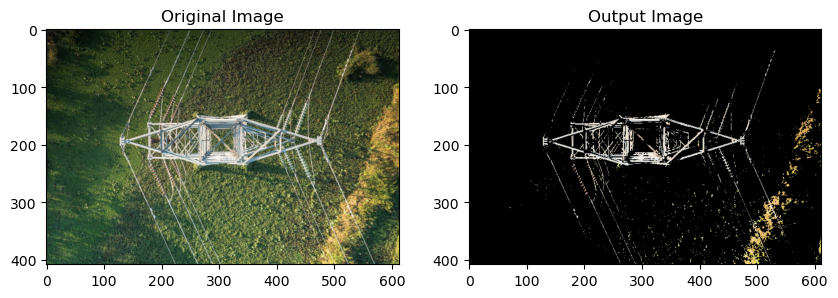

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def houghtransform(subimg):
    edges = cv2.Canny(subimg, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=20, minLineLength=100, maxLineGap=10)
    if lines is not None:
        return True
    else:
        return False

def process_image(inputframe):
    outputframe = np.zeros(inputframe.shape, dtype=np.uint8)
    for x in range(inputframe.shape[0]):
        for y in range(inputframe.shape[1]):
            pixel = inputframe[x, y]
            r, g, b = pixel
            if (0 <= r <= 192 and 0 <= g <= 192 and 0 <= b <= 192) or (0 <= r <= 120 and 0 <= g <= 120 and 0 <= b <= 120) or (44 <= r <= 188 and 45 <= g <= 201 and 14 <= b <= 175):
                subimg = np.array([[pixel]])
                electricline = houghtransform(subimg)
                if electricline:
                    outputframe[x, y] = (255, 255, 255)  # White for electric lines
                else:
                    outputframe[x, y] = (0, 0, 0)  # Black for no electric lines
            else:
                outputframe[x, y] = pixel  # Copy pixel as it is
    return outputframe


# Replace 'image.jpg' with your actual image path
image_path = 'C:/Users/LENOVO/OneDrive/Desktop/major/dataset/electriclines/image12.jpg'
input_frame = cv2.imread(image_path)

# Process the image
output_image = process_image(input_frame)

# Display the original and output images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Output Image')
plt.show()